In [1]:
import cv2

def mosaic(img, rect, size):
    # 모자이크 적용할 부분 추출하기
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    # 축소하고 확대하기
    i_small = cv2.resize(i_rect, (size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    # 모자이크 적용하기
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

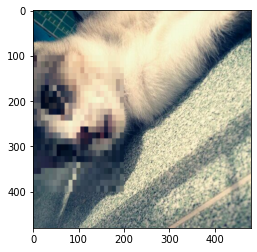

In [30]:
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

# 이미지를 읽어 들이고 모자이크 처리하기
img = cv2.imread("cat.jpg")
mos = mosaic(img, (0, 100, 200, 400), 23)

# 이미지 출력하기
cv2.imwrite("cat-mosaic.png", mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()

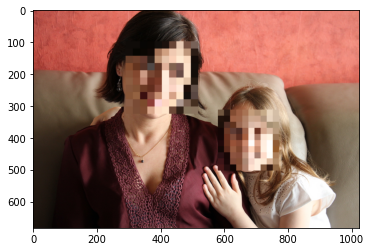

In [36]:
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

# 캐스케이드 파일 지정해서 검출기 생성하기
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어 들이고 그레이스케일로 변환하기
img = cv2.imread("family.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 검출하기
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
if len(face_list) == 0: quit()

# 인식한 부분에 모자이크 처리하기
for (x,y,w,h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)

# 이미지 출력하기
cv2.imwrite("family-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

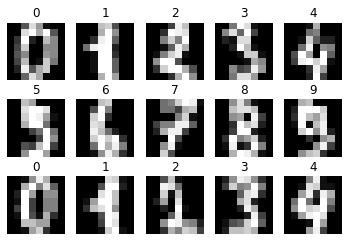

In [67]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()

for i in range(15):
  plt.subplot(3,5, i+1)
  plt.axis("off")
  plt.title(str(digits.target[i]))
  plt.imshow(digits.images[i], cmap='gray')

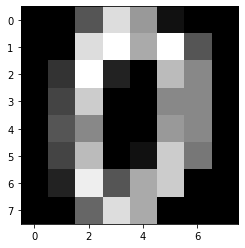

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [40]:
d0 = digits.images[0]
plt.imshow(d0, cmap="gray")
plt.show()
print(d0)

In [68]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

# 데이터 읽어 들이기
digits = datasets.load_digits()
x = digits.images
y = digits.target
x = x.reshape((-1, 64)) # 2차원 배열을 1차원 배열로 변환하기

# 데이터를 학습 전용과 테스트 전용으로 분리하기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 데이터 학습하기
clf = svm.LinearSVC()
clf.fit(x_train, y_train)

# 예측하고 정답률 출력하기
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9472222222222222


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [69]:
from sklearn.externals import joblib
joblib.dump(clf, 'digits.pkl')

['digits.pkl']

In [72]:
import cv2
from sklearn.externals import joblib

def predict_digit(filename):
    
    # 학습한 데이터 읽어 들이기
    clf = joblib.load("digits.pkl")
   
    # 직접 그린 손글씨 이미지 읽어 들이기
    my_img = cv2.imread(filename)
   
    # 이미지 데이터를 학습에 적합하게 변환하기
    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    my_img = cv2.resize(my_img, (8, 8))
    my_img = 15 - my_img // 16 # 흑백 반전
   
    # 2차원 배열을 1차원 배열로 변환하기
    my_img = my_img.reshape((-1, 64))
  
    # 데이터 예측하기
    res = clf.predict(my_img)
    return res[0]

# 이미지 파일을 지정해서 실행하기
n1 = predict_digit("my2.png")
print("my2.png = " + str(n1))
n2 = predict_digit("my4.png")
print("my4.png = " + str(n2))
n3 = predict_digit("mynine.png")
print("mynine.png = " + str(n3))

my2.png = 2
my4.png = 4
mynine.png = 0


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] [0 1 2 ... 8 9 8] 191 191


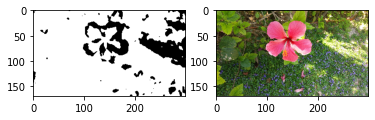

In [85]:
import cv2
import matplotlib.pyplot as plt

# 이미지 읽어 들이고 크기 변경하기
img = cv2.imread("flower.jpg")
img = cv2.resize(img, (300, 169))

# 색공간 변경하기
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0) 
im2 = cv2.threshold(gray, 140, 240, cv2.THRESH_BINARY_INV)[1]

# 화면 왼쪽에 변환한 이미지 출력하기
plt.subplot(1, 2, 1)
plt.imshow(im2, cmap="gray")

# 윤곽 검출하기 
cnts = cv2.findContours(im2, 
        cv2.RETR_LIST,
        cv2.CHAIN_APPROX_SIMPLE)[1]

# 검출한 윤곽 그리기
for pt in cnts:
    # x, y, w, h = cv2.boundingRect(pt)
#     # 너무 크거나 너무 작은 부분 제거하기
    if w < 30 or w > 200: continue
    print(x,y,w,h) # 결과 출력하기
    # cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# 화면 오른쪽에 결과 출력하기
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig("find_contours.png", dpi=200)